In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
import keras
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from livelossplot.keras import PlotLossesCallback
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
import numpy as np

In [0]:
data = pd.read_csv('/content/drive/My Drive/BTP/data.csv')

In [0]:
X = data.iloc[:, 1:179]
y = data.iloc[:, 179]

In [0]:
y = y.values.tolist()
for i in range(len(y)):
  if y[i] != 1:
    y[i] = 0
y = pd.DataFrame(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [0]:
X_train.shape

(9200, 178)

In [0]:
X_test.shape

(2300, 178)

In [0]:
y_train.shape

(9200, 1)

In [0]:
y_test.shape

(2300, 1)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
X_train = np.expand_dims(X_train, axis = 2)
X_test = np.expand_dims(X_test, axis = 2)

In [0]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters = 1, kernel_size = 5, activation = 'relu', input_shape = (178, 1)))
model_cnn.add(MaxPooling1D(pool_size = 2))
model_cnn.add(Conv1D(filters = 1, kernel_size = 5, activation = 'relu', input_shape = (87, 1)))
model_cnn.add(MaxPooling1D(pool_size = 2))
model_cnn.add(Flatten())
model_cnn.add(Dense(70, activation = 'relu'))
#model_cnn.add(Dropout(0.1))
model_cnn.add(Dense(1, activation = 'sigmoid'))

In [0]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_26 (Conv1D)           (None, 174, 1)            6         
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 87, 1)             0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 83, 1)             6         
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 41, 1)             0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 41)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 70)                2940      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 71        
Total para

In [0]:
model_cnn.compile(optimizer = 'adagrad', loss = 'mean_squared_error', metrics = ['accuracy'])

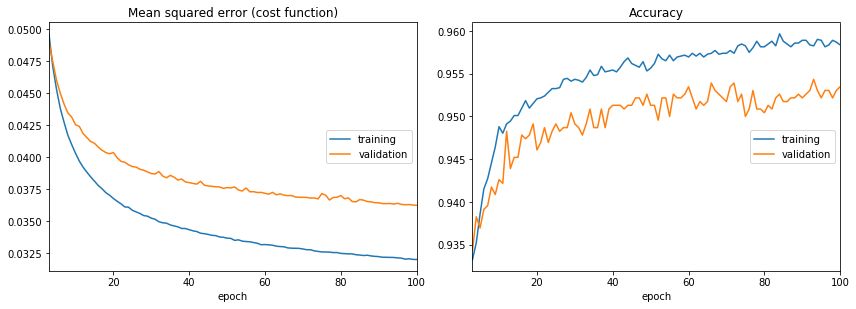

Mean squared error (cost function):
training   (min:    0.032, max:    0.078, cur:    0.032)
validation (min:    0.036, max:    0.059, cur:    0.036)

Accuracy:
training   (min:    0.888, max:    0.960, cur:    0.958)
validation (min:    0.921, max:    0.954, cur:    0.953)
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


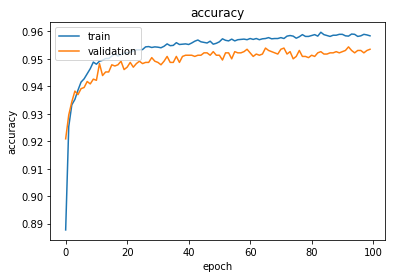

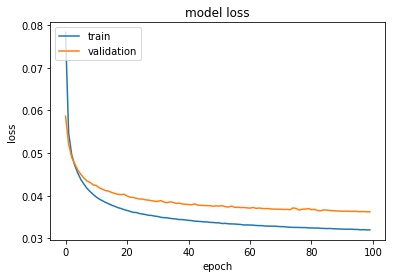

In [0]:
history = model_cnn.fit(X_train, y_train, batch_size = 4, epochs = 100, validation_data = (X_test, y_test), callbacks = [PlotLossesCallback()])
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
model_cnn.evaluate(X_test, y_test)

2300/2300 [==============================] - 0s 66us/step


[0.036215503319450046, 0.9534782610768857]